<a href="https://colab.research.google.com/github/damianr14/analisis-realestate/blob/main/Entrega_9_Real_Estate_Sales_2001_2020_Damian_Roch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Entrega 9: Análisis Inmobiliario - Obtencion de Insight**

In [ ]:
# Conexion con Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importacion de Librerias
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import calendar
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
sns.set()

In [ ]:
# Path del desafio
path = "/content/drive/MyDrive/Data Science - Damian Roch - TP/Obtencion de Insight/"

Dataset elegido: Analisis de Datos Inmobiliarios

In [ ]:
# Carga del archivo csv elegido
df = pd.read_csv(path+'Real_Estate_Sales_2001-2020.csv')

<ipython-input-4-bd03cfca1128>:2: DtypeWarning: Columns (8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path+'Real_Estate_Sales_2001-2020.csv')


In [ ]:
# Visualizacion de parte del dataset
df.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,NaN,NaN,NaN,NaN,NaN
1,20002,2020,10/02/2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.5883,Residential,Single Family,NaN,NaN,NaN,NaN
2,200212,2020,03/09/2021,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.7248,Residential,Condo,NaN,NaN,NaN,NaN
3,200243,2020,04/13/2021,Avon,111 NORTHINGTON DRIVE,619290.0,890000.0,0.6958,Residential,Single Family,NaN,NaN,NaN,NaN
4,200377,2020,07/02/2021,Avon,70 FAR HILLS DRIVE,862330.0,1447500.0,0.5957,Residential,Single Family,NaN,NaN,NaN,NaN


In [ ]:
# Camnbio de varible 'created_on' a datos de tipo fecha.
df['Date Recorded'] = pd.to_datetime(df['Date Recorded'])



Introducción: Breve Descripción del Análisis a Realizar

Contexto Empresarial

El mercado inmobiliario en Connecticut ha sido objeto de interés debido a su dinámica y relevancia económica. El objetivo de este análisis es examinar las variables de venta y cotización de inmuebles en Connecticut, así como las zonas de ventas en el estado.

Problema Comercial

A pesar de la importancia del mercado inmobiliario en Connecticut, existe la necesidad de comprender mejor las variables que influyen en las ventas y cotizaciones de los inmuebles. Se busca analizar el precio de venta, la fecha de venta, la ubicación geográfica y otros factores relevantes para obtener una visión integral del mercado inmobiliario en Connecticut.

Contexto Analítico

Para llevar a cabo este análisis, se utilizará una base de datos de ventas de inmuebles en Connecticut. Esta base de datos contendrá información sobre variables clave, como el precio de venta, la fecha de venta, la ubicación geográfica, el tipo de propiedad y el tamaño del inmueble.

El análisis se enfocará en examinar las variables de venta, como el precio de venta y la fecha de venta, para comprender la distribución de los precios y analizar las tendencias a lo largo del tiempo. Además, se analizarán las cotizaciones de los inmuebles para evaluar las diferencias entre las cotizaciones y los precios de venta, lo que proporcionará información sobre la dinámica de precios en el mercado inmobiliario de Connecticut.

También se llevará a cabo un análisis de las zonas de ventas en Connecticut. Utilizando la información de ubicación geográfica, se segmentarán los datos por zonas geográficas relevantes, por ejemplo ciudades. Se compararán las ventas, los precios y otros factores relevantes en cada zona para identificar patrones y diferencias significativas.

El objetivo final es obtener una comprensión más profunda del mercado inmobiliario en Connecticut, identificar las variables clave que influyen en las ventas y cotizaciones, y proporcionar información valiosa para los actores del mercado, como agentes inmobiliarios y compradores de viviendas.


Descripcion del analisis de realizar:

La siguiente base de datos, que es de gran tamaño y contiene casi un millón de filas, tiene como objetivo analizar los valores de tasación y venta en los Estados Unidos, específicamente en el estado de Connecticut.

Esta base de datos proporciona información detallada sobre cada transacción de venta, incluyendo la ciudad, la dirección, la fecha de venta, el tipo de propiedad (residencial, departamento, comercial, industrial o vacante), el precio de venta y el precio de cotización. Además, se creará una nueva variable que refleje la diferencia entre el precio de venta y la cotización original.

En primer lugar, se realizará un análisis de las publicaciones incluidas en el conjunto de datos para obtener una visión general de la composición de propiedades por tipo y precio. Este análisis ampliará nuestra comprensión del conjunto de datos. Una vez completado este análisis, se podrán explorar modelos que permitan analizar la temporalidad de los precios y las diferencias entre los valores de venta y cotización según el tipo de propiedad.

Con los datos proporcionados en la base de datos de valores de tasación y venta en Connecticut, se pueden realizar diversos análisis para obtener información valiosa. Algunas posibles análisis a considerar son:

Análisis de composición por tipo de propiedad: Examinar la distribución de las propiedades según su tipo (residencial, departamento, comercial, industrial o vacante) para comprender la proporción de cada categoría y detectar tendencias o patrones relevantes.

Análisis de precios por tipo de propiedad: Comparar los precios de venta entre diferentes tipos de propiedades para identificar aquellas categorías que suelen tener valores más altos o más bajos. Esto puede ayudar a comprender las dinámicas de precios en el mercado inmobiliario de Connecticut.

Análisis de temporalidad de precios: Examinar la evolución de los precios de venta a lo largo del tiempo, considerando la fecha de venta. Esto puede descubrir tendencias estacionales, cambios a largo plazo en el mercado o eventos específicos que hayan afectado los precios.

Se realizará un análisis de diferencia entre precio de venta y cotización original: Calculando la diferencia entre el precio de venta y el precio de cotización original para evaluar las posibilidades y margenes de negociación de precios  o la precisión de las tasaciones iniciales. De esta manera se podra analizar la eficacia en la tasacion en la ciudad.

Estos son solo algunos de los análisis que se pueden realizar con los datos proporcionados y depende un poco del avance de la cursada y las herramientas a utilizar, por ejemplo analisis de distribucion geografica.

A lo largo de este trabajo se intentarán probar una serie de hipotesis:

Hipótesis 1: Las propiedades residenciales tienen un mayor precio de venta en comparación con las propiedades comerciales e industriales.

Esta hipótesis supone que las propiedades de uso residencial tienden a tener valores más altos en el mercado inmobiliario.

Hipótesis 2: Existe una relación directa entre la ubicación geográfica de una propiedad y su valor de tasación o venta.

Esta hipótesis sugiere que ciertas áreas geográficas pueden tener un impacto significativo en los precios de tasación o venta de las propiedades. Se podría realizar un análisis geoespacial y comparar los valores por ubicación para probar o refutar esta hipótesis.

Hipótesis 3: Las propiedades con una mayor diferencia entre el precio de venta y la cotización original tienden a permanecer más tiempo en el mercado.

Esta hipótesis plantea que las propiedades que requieren una mayor negociación en el precio inicial pueden tener una mayor duración en el mercado inmobiliario.

Hipótesis 4: Los precios de venta de las propiedades en Connecticut varían según la temporada del año.

Esta hipótesis sugiere que los precios de venta pueden mostrar variaciones estacionales en el mercado inmobiliario.

Hipótesis 5: El efecto de la pandemia de COVID-19 tuvo un impacto significativo en los precios de las propiedades del centro y las afueras de las ciudades.

Esta hipótesis requiere un analisis espacial y temporal de los precios de venta para identificar si hubo o no una migracion poblacional hacia sectores con espacios mas abiertos.


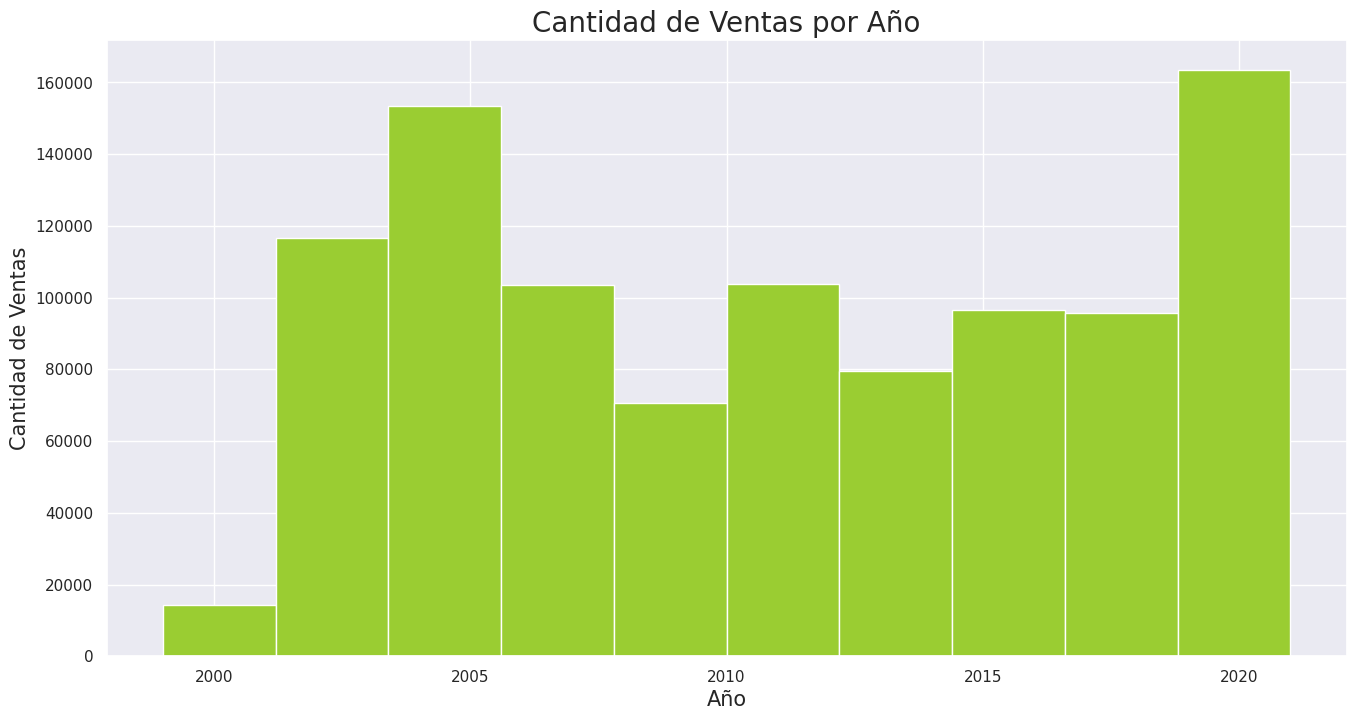

In [ ]:
# Representacion de Ventas por año
ventas_por_anio = df['Date Recorded'].dt.year
fig, ax = plt.subplots(figsize=(16, 8))
ax.hist(ventas_por_anio, color='yellowgreen')
ax.set_title('Cantidad de Ventas por Año', fontsize=20)
ax.set_xlabel('Año', fontsize=15)
ax.set_ylabel('Cantidad de Ventas', fontsize=15)
plt.show()

> Se puede observar en este histograma de Matplotlib cómo las ventas luego del pico del 2005, tuvo un amecetamiento hasta volver a tener un fuerte incremento en el 2020. Esto representa un dato interesante ya que fue en esa epoca que comenzo la pandemia, y tal vez haciendo un analisis mayor se podria identificar las zonas donde aunmentaron las ventas de propiedades e inducir cuales fueron los motivos.

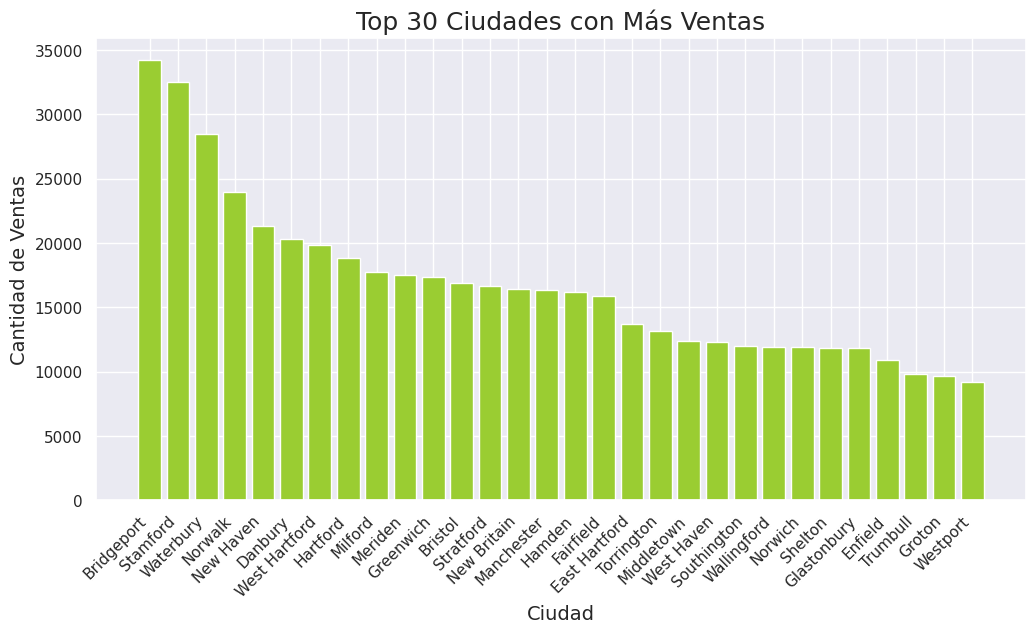

In [ ]:
# Obtener las 10 ciudades con más ventas
ventas_por_ciudad = df['Town'].value_counts().head(30)
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(ventas_por_ciudad.index, ventas_por_ciudad.values, color='yellowgreen')
ax.set_title('Top 30 Ciudades con Más Ventas', fontsize=18)
ax.set_xlabel('Ciudad', fontsize=14)
ax.set_ylabel('Cantidad de Ventas', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()

Analizar las ventas por ciudad permitirá poder realizar un seguimiento de poblacion geograficamente, e inducir potenciales aumentos de demanda de propiedades, si sumamos un analisis por tipo, para poder predecir modificaciones futuras en los precios.

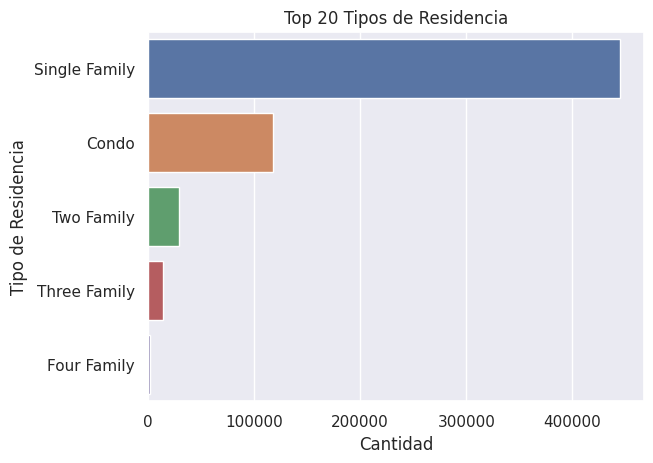

In [ ]:
# Grafico por el tipo de residencia por año de venta
top_20_residencia = df['Residential Type'].value_counts().head(20)
sns.barplot(x=top_20_residencia.values, y=top_20_residencia.index, orient='h')
plt.title('Top 20 Tipos de Residencia')
plt.xlabel('Cantidad')
plt.ylabel('Tipo de Residencia')
plt.show()

Un analisis por tipo de propiedad va a permitir a los desarrolladores orientar sus inversiones en los proyectos con mayor salida de venta.

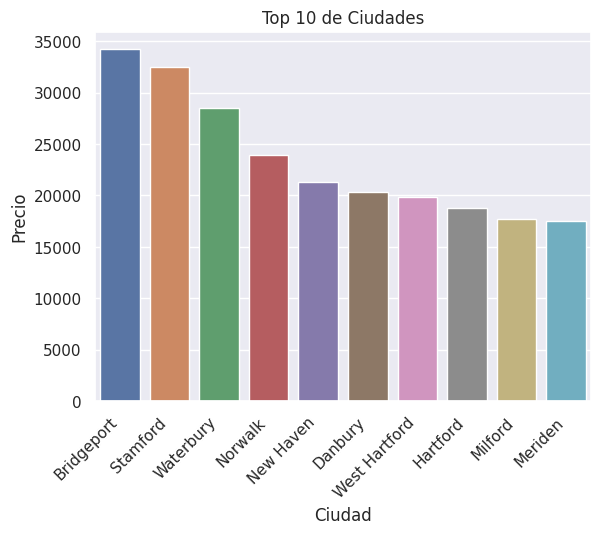

In [ ]:
# Cantidad de ventas por ciudad
top_10_ciudades = df['Town'].value_counts().head(10)
sns.countplot(x="Town", data=df, order=top_10_ciudades.index)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 de Ciudades')
plt.xlabel('Ciudad')
plt.ylabel('Precio')
plt.show()

Realizar un analisis detallado de ventas por ciudad permitira mediante un modelo de mayor alcance poder determinar el tipo de propiedades y ciudades que prefieren los compradores. Esto va a permitir analizar la oferta y mejorar la cotizacion de las mismas, un punto que a simple vista es un analisis a realizar por la discrepancia entre el valor de cotizacion y de venta final en las propiedades analizadas.

Definitivamente va a ser necesario comenzar a hacer algun analisis de agrupamiento de datos por ciudad, o crear nuevas variables que permitan determinar insight mas determinantes.

TP 5 - Estructurando un Proyecto DS parte III

In [ ]:
Punto 1 - Analisis Exploratorio de Datos

# Ver las primeras filas del conjunto de datos
print(df.head())

# Obtener información sobre el tipo de datos y cantidad de valores no nulos
print(df.info())

# Estadísticas descriptivas del conjunto de datos
print(df.describe())

   Serial Number  List Year Date Recorded     Town                Address  \
0        2020348       2020    2021-09-13  Ansonia        230 WAKELEE AVE   
1          20002       2020    2020-10-02  Ashford        390 TURNPIKE RD   
2         200212       2020    2021-03-09     Avon       5 CHESTNUT DRIVE   
3         200243       2020    2021-04-13     Avon  111 NORTHINGTON DRIVE   
4         200377       2020    2021-07-02     Avon     70 FAR HILLS DRIVE   

   Assessed Value  Sale Amount  Sales Ratio Property Type Residential Type  \
0        150500.0     325000.0       0.4630    Commercial              NaN   
1        253000.0     430000.0       0.5883   Residential    Single Family   
2        130400.0     179900.0       0.7248   Residential            Condo   
3        619290.0     890000.0       0.6958   Residential    Single Family   
4        862330.0    1447500.0       0.5957   Residential    Single Family   

  Non Use Code Assessor Remarks OPM remarks Location  
0          Na

In [ ]:
# Definicion de variables
data = pd.read_csv(path+'Real_Estate_Sales_2001-2020.csv')
data['Date Recorded'] = pd.to_datetime(data['Date Recorded'])
data['Date Recorded'] = pd.to_datetime(data['Date Recorded'])

# Eliminación de las columnas no numéricas y las fechas del conjunto de características
features_to_drop = ['Serial Number', 'Date Recorded', 'Town', 'Address', 'Property Type', 'Residential Type', 'Non Use Code', 'Assessor Remarks', 'OPM remarks', 'Location']
X = data.drop(columns=['Sale Amount'] + features_to_drop)

# Confirmacion de que k_best_features sea menor o igual al número de características restantes
k_best_features = min(3, X.shape[1])

skb = SelectKBest(score_func=f_regression, k=k_best_features)
X_reduced = skb.fit_transform(X, y)

# División del conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Entrenamiento del modelo de regresión
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones y calculo de métricas
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')


<ipython-input-38-0ed7583bae77>:10: DtypeWarning: Columns (8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path+'Real_Estate_Sales_2001-2020.csv')


Mean Squared Error (MSE): 4110462146490.6465
R-squared (R2): 0.12988087104038493


Conclusiones:

Basándonos en los resultados obtenidos, podemos obtener varias conclusiones importantes sobre nuestro modelo de regresión lineal y el proceso de feature selection realizado.

En primer lugar, al aplicar SelectKBest para reducir la dimensionalidad de nuestro conjunto de características, pudimos destacar las 3 características más relevantes para predecir el valor de 'Sale Amount'. Sin embargo, el bajo R-squared (R2) y el elevado Mean Squared Error (MSE) nos indican que nuestro modelo lineal no está logrando un ajuste óptimo a los datos. Esto puede deberse a que las características seleccionadas no capturan adecuadamente la complejidad del problema, y posiblemente se necesiten más atributos o características más detallada para mejorar la calidad de las predicciones.

En resumen, los resultados obtenidos hasta el momento nos brindan información valiosa sobre las debilidades actuales de nuestro modelo. Continuaremos refinando nuestro enfoque, explorando nuevas características y probando diferentes algoritmos para mejorar la precisión y la capacidad de generalización de nuestro modelo de predicción de 'Sale Amount'.

Evaluando Modelos ML

In [ ]:
# Carga del conjunto de datos y redefinicion de variable
data = pd.read_csv(path+'Real_Estate_Sales_2001-2020.csv')

# Preprocesamiento de datos
data['Date Recorded'] = pd.to_datetime(data['Date Recorded'])
features_to_drop = ['Serial Number', 'Date Recorded', 'Town', 'Address', 'Property Type', 'Residential Type', 'Non Use Code', 'Assessor Remarks', 'OPM remarks', 'Location']
X = data.drop(columns=['Sale Amount'] + features_to_drop)
y = data['Sale Amount']

# Aseguramiento de que k_best_features sea menor o igual al número de características restantes
k_best_features = min(3, X.shape[1])

# Selección de características
skb = SelectKBest(score_func=f_regression, k=k_best_features)
X_reduced = skb.fit_transform(X, y)

# Conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Potenciales modelos a evaluar
models = [LinearRegression(), RandomForestRegressor(), GradientBoostingRegressor()]

# Evaluación de modelos y análisis de overfitting/underfitting
for model in models:
    model_name = model.__class__.__name__

    # Entrenamiento de modelo con conjunto de entrenamiento
    model.fit(X_train, y_train)

    # Predicciones y calculo de métricas con conjunto de prueba
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"{model_name} - Mean Squared Error (MSE): {mse:.2f}")
    print(f"{model_name} - R-squared (R2): {r2:.2f}")

    # Validación cruzada para obtener estimación del rendimiento con mayor grado de confianza
    cv_scores = cross_val_score(model, X_reduced, y, cv=5, scoring='neg_mean_squared_error')
    cv_mse = -np.mean(cv_scores)
    print(f"{model_name} - Cross-Validated MSE: {cv_mse:.2f}\n")

<ipython-input-11-dcbcf5793d9e>:2: DtypeWarning: Columns (8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path+'Real_Estate_Sales_2001-2020.csv')


LinearRegression - Mean Squared Error (MSE): 4110462146490.65
LinearRegression - R-squared (R2): 0.13
LinearRegression - Cross-Validated MSE: 28267007359171.95

RandomForestRegressor - Mean Squared Error (MSE): 3636774625477.88
RandomForestRegressor - R-squared (R2): 0.23


A nivel general, los resultados obtenidos indican que el problema de predicción del valor de 'Sale Amount' en el conjunto de datos de bienes raíces es altamente complejo y no puede ser abordado satisfactoriamente por modelos lineales simples. Tanto el modelo de regresión lineal como el RandomForestRegressor mostraron un rendimiento insatisfactorio, lo que sugiere que el problema es más desafiante de lo esperado y que se requiere una mayor exploración y refinamiento de las técnicas utilizadas.

El bajo R-squared (R2) en ambos modelos indica que solo una pequeña fracción de la variabilidad de la variable objetivo está siendo explicada por las características seleccionadas. Además, los altos Mean Squared Errors (MSE) en el conjunto de prueba y en la validación cruzada sugieren que los modelos no están generalizando bien a datos no vistos, lo que apunta a una situación de underfitting.

Para abordar esta situación, se esta trabajando en una estrategia más robusta para la selección de características y la ingeniería de nuevas características relevantes que puedan capturar patrones más complejos presentes en los datos. Además, es se esta trabajando en la posibilidad de explorar modelos más avanzados y complejos, como GradientBoostingRegressor, redes neuronales u otros métodos de aprendizaje profundo que puedan manejar relaciones no lineales en los datos que se iran trabajando a lo largo del curso.

En resumen, esta primera entrega presenta los resultados obtenidos y sugieren que el problema de predicción del valor de 'Sale Amount' es complejo y desafiante, y que se requiere un enfoque más sofisticado y exhaustivo para obtener mejores resultados. Como cientificos de datos se llevará a cabo un proceso iterativo, y es importante continuar experimentando, ajustando enfoques y considerando diferentes modelos y técnicas hasta lograr una aproximación satisfactoria a este problema.